# IMDB+WIKI data preparation

The goal of this notebook is to process the data found in: https://www.kaggle.com/datasets/yuulind/imdb-clean <br>
by aligning the images to follow a tight crop, resizing to 112x112, and organizing the data to be stored in an Images folder and a labels.csv file.

In [1]:
import numpy as np, os, PIL.Image as Image, pandas as pd, matplotlib.pyplot as plt
os.chdir('..')
from utility_scripts.adaface_utils.face_alignment.align import get_aligned_face

In [2]:
dataset_dir = os.path.join('data', 'datasets', 'age gender and race estimation', 'IMDB_WIKI')
os.path.exists(dataset_dir)

True

In [3]:
new_images_dir = os.path.join(dataset_dir, 'Images')
os.makedirs(new_images_dir, exist_ok = True)

In [4]:
old_images_dir = os.path.join(dataset_dir, 'imdb-clean-1024', 'imdb-clean-1024')
os.path.exists(old_images_dir)

True

In [5]:
train_annotations = pd.read_csv(os.path.join(dataset_dir, 'imdb_train_new_1024.csv'))
test_annotations = pd.read_csv(os.path.join(dataset_dir, 'imdb_test_new_1024.csv'))
validation_annotations = pd.read_csv(os.path.join(dataset_dir, 'imdb_valid_new_1024.csv'))

In [6]:
annotations = pd.concat([train_annotations, test_annotations, validation_annotations], ignore_index = True)
annotations = annotations.drop(columns = ['head_roll', 'head_yaw', 'head_pitch'])

In [7]:
annotations.head()

,filename,age,gender,x_min,y_min,x_max,y_max
0,05/nm0200005_rm3512895744_1959-12-24_2009.jpg,50,M,78.0,93.0,155.0,185.0
1,02/nm0001002_rm1464638208_1966-7-31_2006.jpg,40,M,123.0,175.0,245.0,349.0
2,00/nm0000100_rm103389184_1955-1-6_2005.jpg,50,M,52.0,70.0,103.0,139.0
3,04/nm0024404_rm2909178368_1978-2-20_2009.jpg,31,F,28.0,38.0,55.0,75.0
4,00/nm0703800_rm31823616_1959-6-6_2008.jpg,49,M,69.0,100.0,137.0,199.0


In [8]:
annotations.tail()

,filename,age,gender,x_min,y_min,x_max,y_max
285941,94/nm0000194_rm4092982272_1960-12-3_2015.jpg,55,F,364.0,341.0,659.0,682.0
285942,97/nm0629697_rm1496364288_1980-1-8_2012.jpg,32,F,59.0,80.0,117.0,159.0
285943,93/nm0000093_rm3423637248_1963-12-18_2004.jpg,41,M,121.0,186.0,241.0,371.0
285944,91/nm0249291_rm1151837696_1974-6-23_2012.jpg,38,M,386.0,341.0,637.0,681.0
285945,93/nm0708293_rm559070464_1973-10-2_2011.jpg,38,M,386.0,341.0,636.0,681.0


In [9]:
filenames = []
ages = []
genders = []

for i in range(len(annotations)):
    image_subpath = annotations.iloc[i]['filename']
    folder, image_name = image_subpath.split('/')
    image_path = os.path.join(old_images_dir, folder, image_name)
    image = Image.open(image_path)
    age = int(annotations.iloc[i]['age'])
    gender = 1 if annotations.iloc[i]['gender'] == 'M' else 0 # M = 1, F = 0

    aligned_image = get_aligned_face(image_path = None, rgb_pil_image=image)

    if aligned_image is None: # if the alignment script fails, fallback to the bounding box labels provided by the dataset
        x_min = int(annotations.iloc[i]['x_min'])
        y_min = int(annotations.iloc[i]['y_min'])
        x_max = int(annotations.iloc[i]['x_max'])
        y_max = int(annotations.iloc[i]['y_max'])
        aligned_image = image.crop(box = (x_min, y_min, x_max, y_max))
        aligned_image = image.resize(size = (112, 112))

    filename = f'{i}.jpg'
    aligned_image.save(os.path.join(new_images_dir, filename))

    filenames.append(filename)
    ages.append(age)
    genders.append(gender)
       


Face detection Failed due to error.
list index out of range
Face detection Failed due to error.
list index out of range
Face detection Failed due to error.
list index out of range
Face detection Failed due to error.
list index out of range
Face detection Failed due to error.
list index out of range
Face detection Failed due to error.
list index out of range
Face detection Failed due to error.
list index out of range
Face detection Failed due to error.
list index out of range
Face detection Failed due to error.
list index out of range
Face detection Failed due to error.
list index out of range
Face detection Failed due to error.
list index out of range
Face detection Failed due to error.
list index out of range
Face detection Failed due to error.
list index out of range
Face detection Failed due to error.
list index out of range
Face detection Failed due to error.
list index out of range
Face detection Failed due to error.
list index out of range
Face detection Failed due to error.
list

In [11]:
labels_df = pd.DataFrame(
    data = {
        'filename' : filenames,
        'age' : ages,
        'gender' : genders
    }
)

labels_df.to_csv(os.path.join(dataset_dir, 'labels.csv'), index = False)

# EDA

In [14]:
labels_df = pd.read_csv(os.path.join(dataset_dir, 'labels.csv'))

In [16]:
labels_df.head()

,filename,age,gender
0,0.jpg,50,1
1,1.jpg,40,1
2,2.jpg,50,1
3,3.jpg,31,0
4,4.jpg,49,1


In [17]:
genders, gender_counts = np.unique(labels_df['gender'], return_counts = True)

In [22]:
figures_output_dir = os.path.join('data', 'figures', 'Age Gender Race', 'IMDB+WIKI')
os.makedirs(figures_output_dir, exist_ok = True)

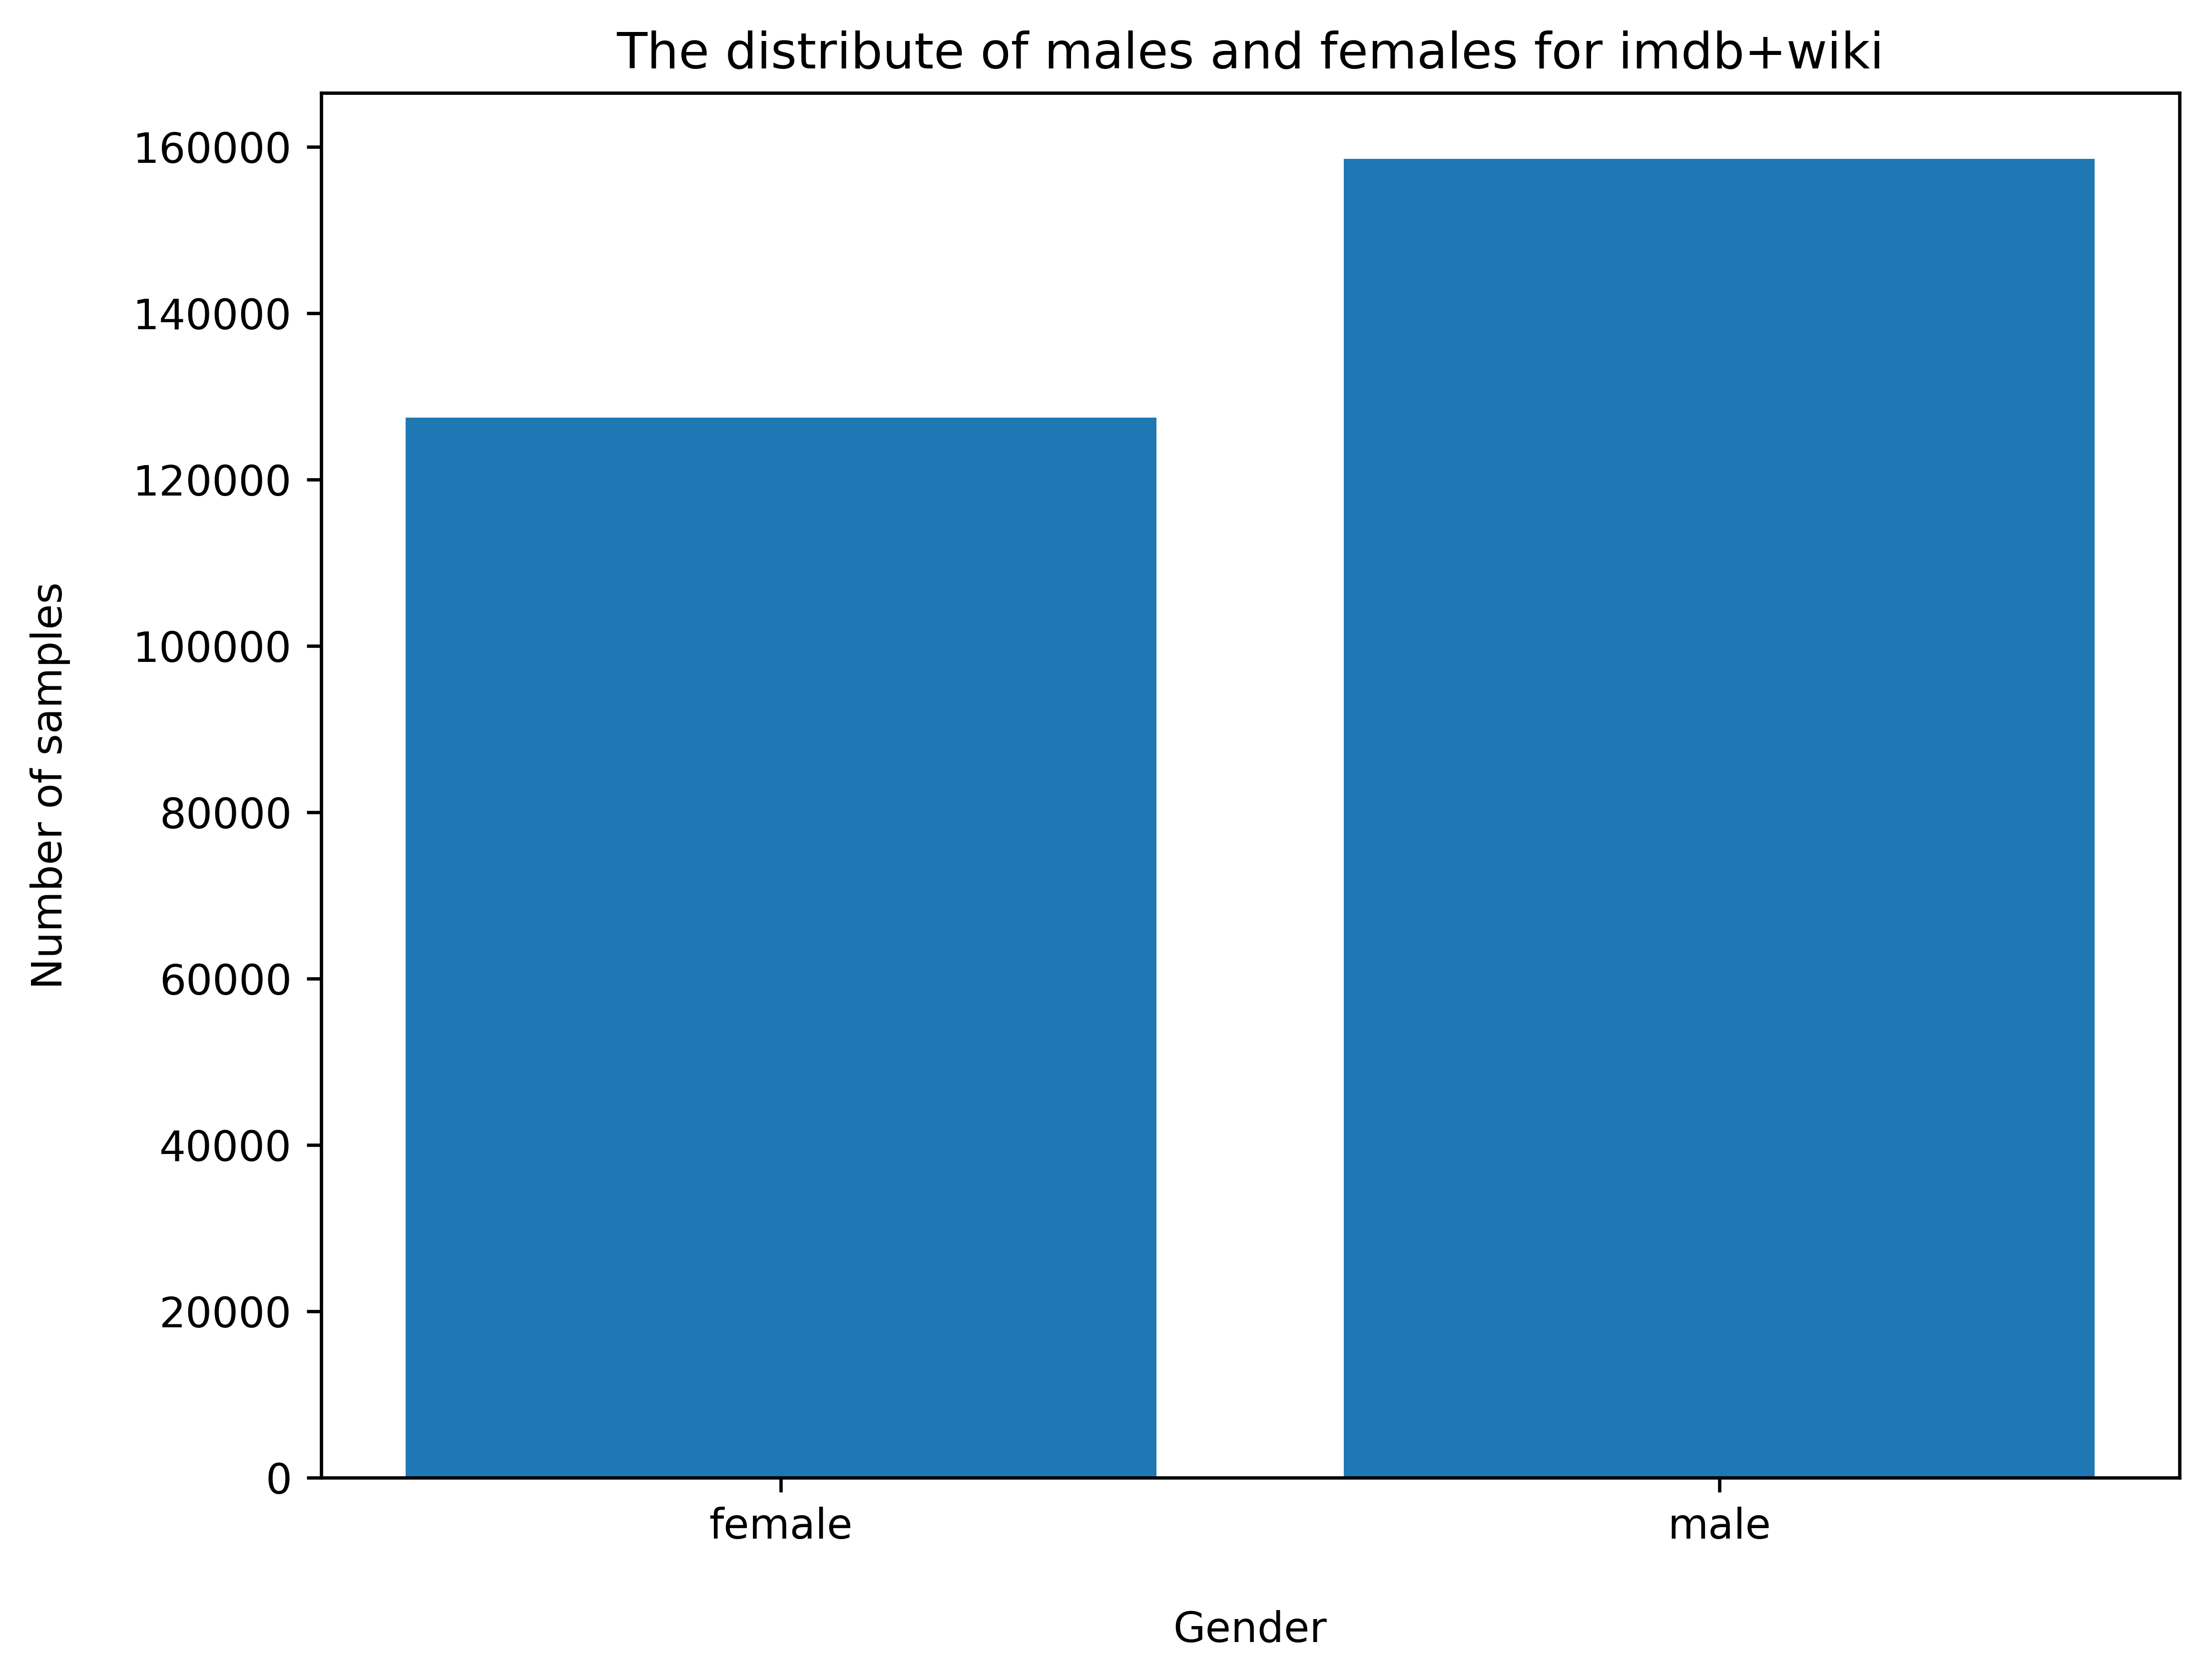

In [24]:
plt.figure(figsize = (8, 6), dpi = 600)
plt.bar(x = ['female', 'male'], height = gender_counts)
plt.title('The distribute of males and females for imdb+wiki')
plt.xlabel('Gender', labelpad = 15)
plt.ylabel('Number of samples', labelpad = 15)
plt.savefig(
    os.path.join(figures_output_dir, 'The distribution of males and females for imdb+wiki')
)
plt.show()

In [25]:
ages, age_counts = np.unique(labels_df['age'], return_counts = True)

In [29]:
average_age = sum(ages * age_counts) / sum(age_counts)
print(f'The average age in imdb+wiki is: {average_age}')

The average age in imdb+wiki is: 37.11182181251005


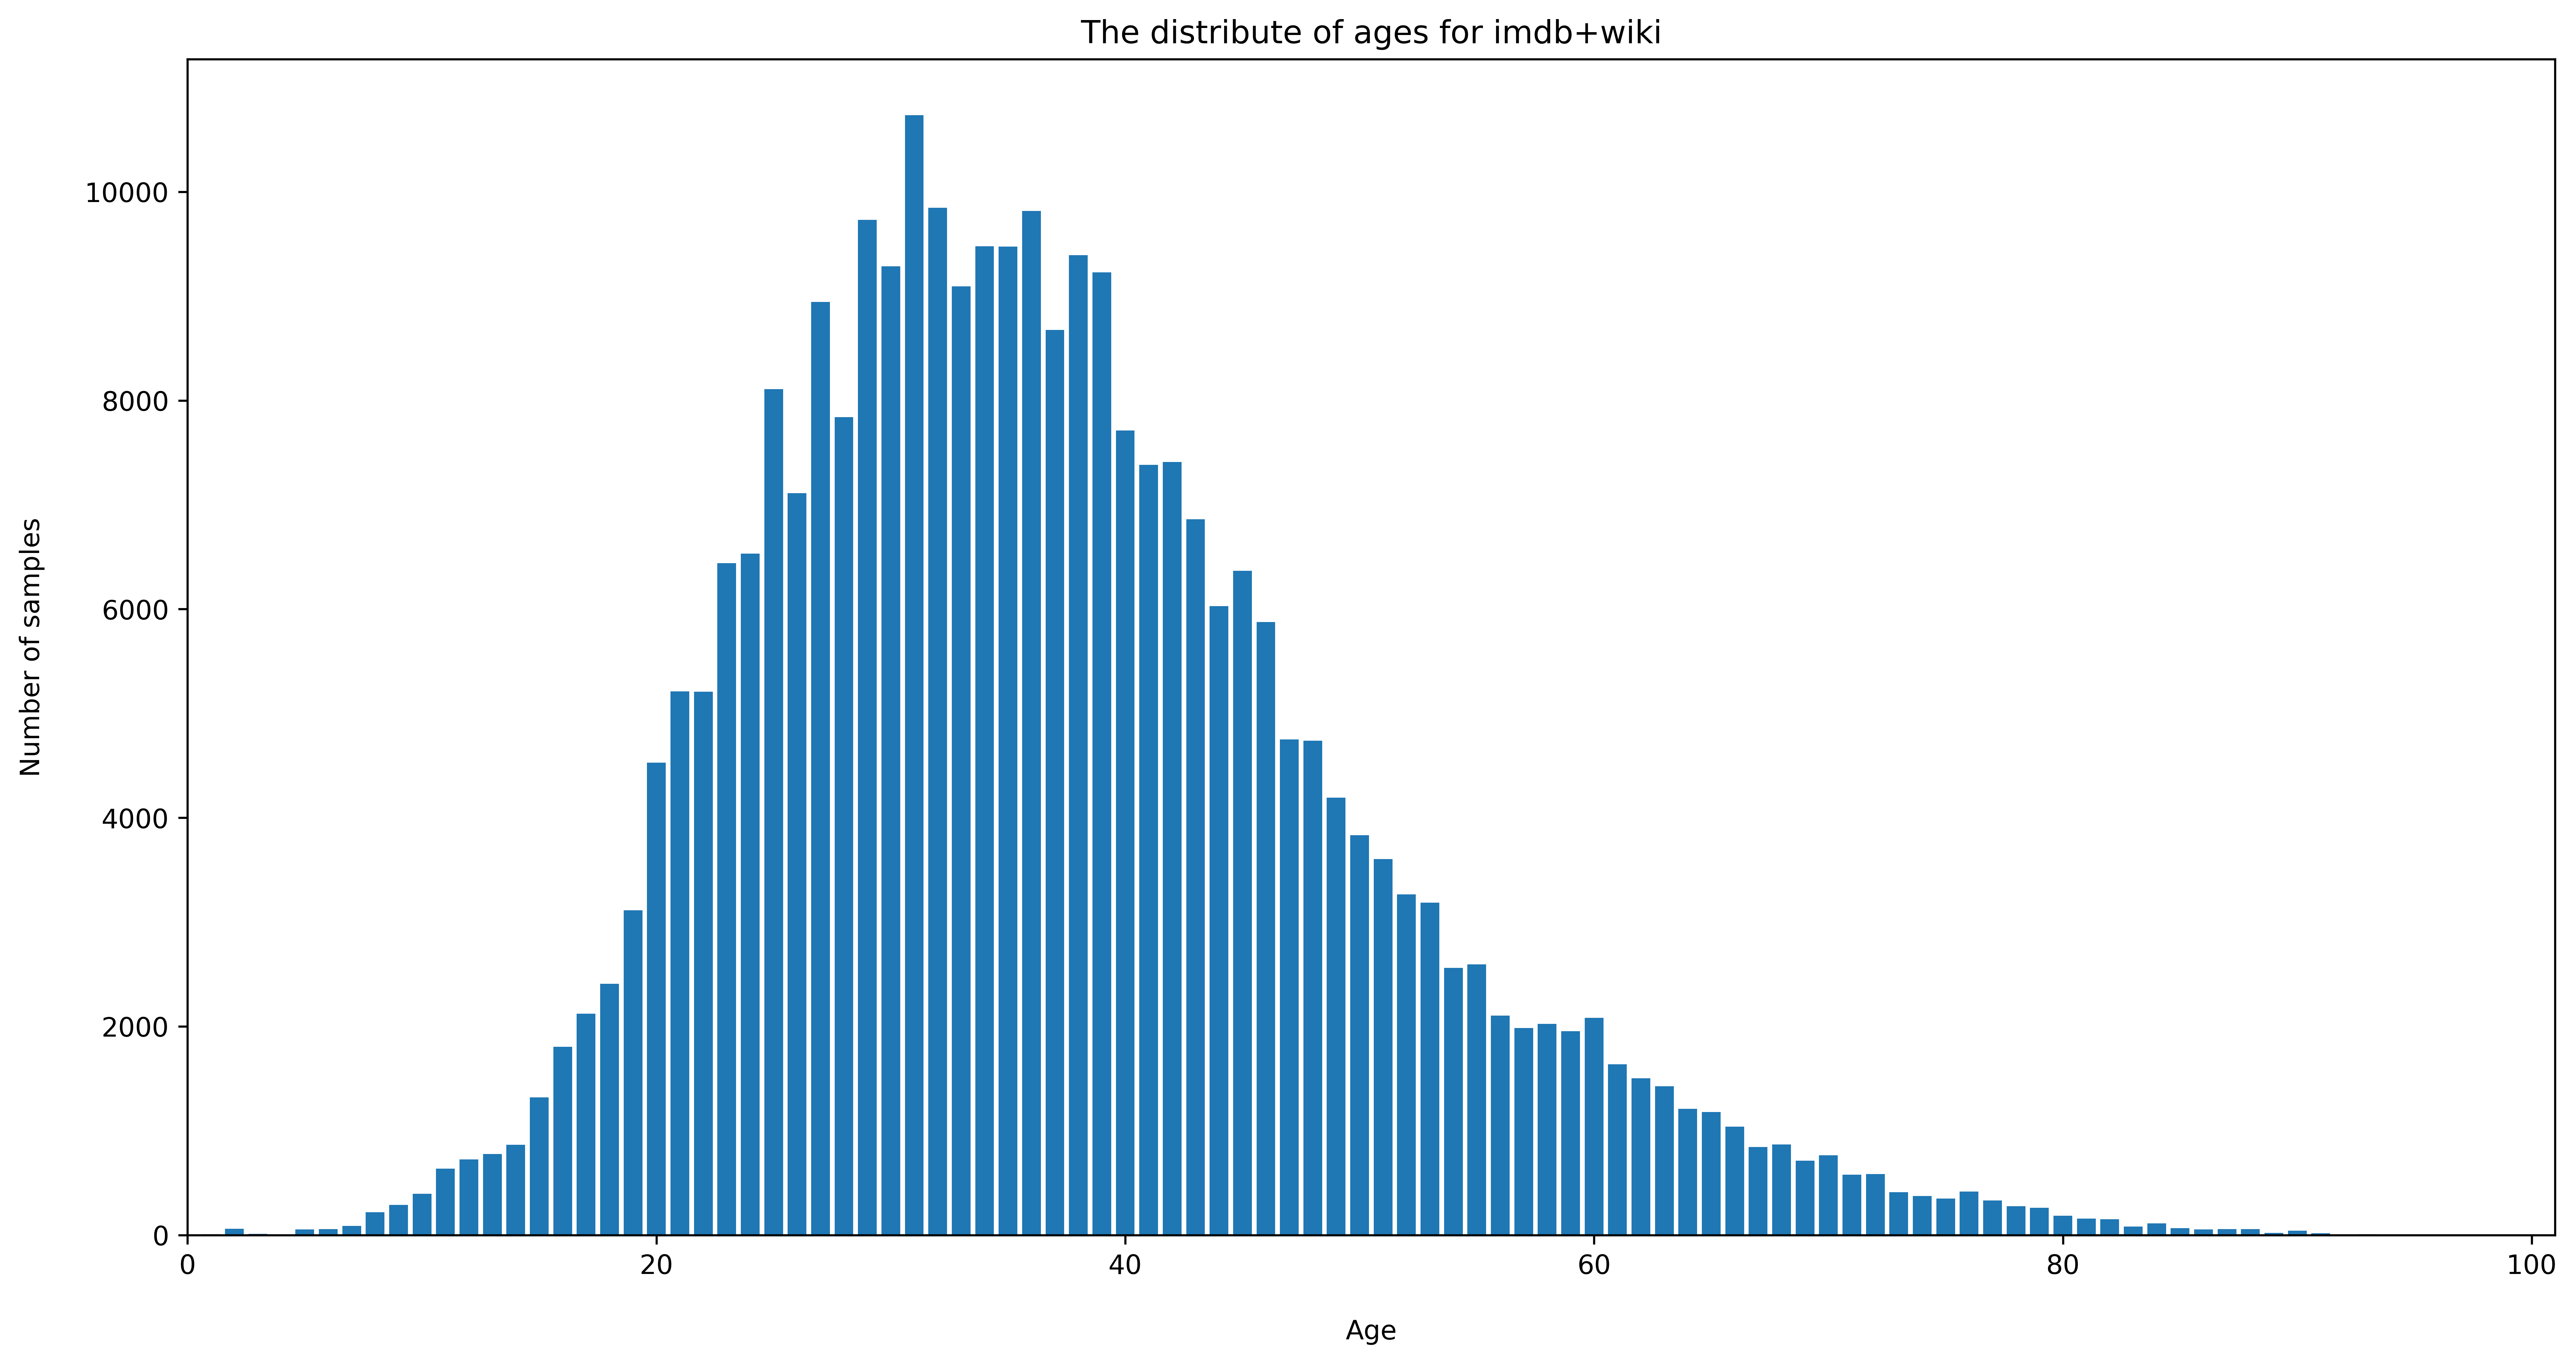

In [28]:
plt.figure(figsize = (16, 8), dpi = 600)
plt.bar(x = ages, height = age_counts)
plt.title('The distribute of ages for imdb+wiki')
plt.xlim([0, 101])
plt.xlabel('Age', labelpad = 15)
plt.ylabel('Number of samples', labelpad = 15)
plt.savefig(
    os.path.join(figures_output_dir, 'The distribution of ages for imdb+wiki')
)
plt.show()

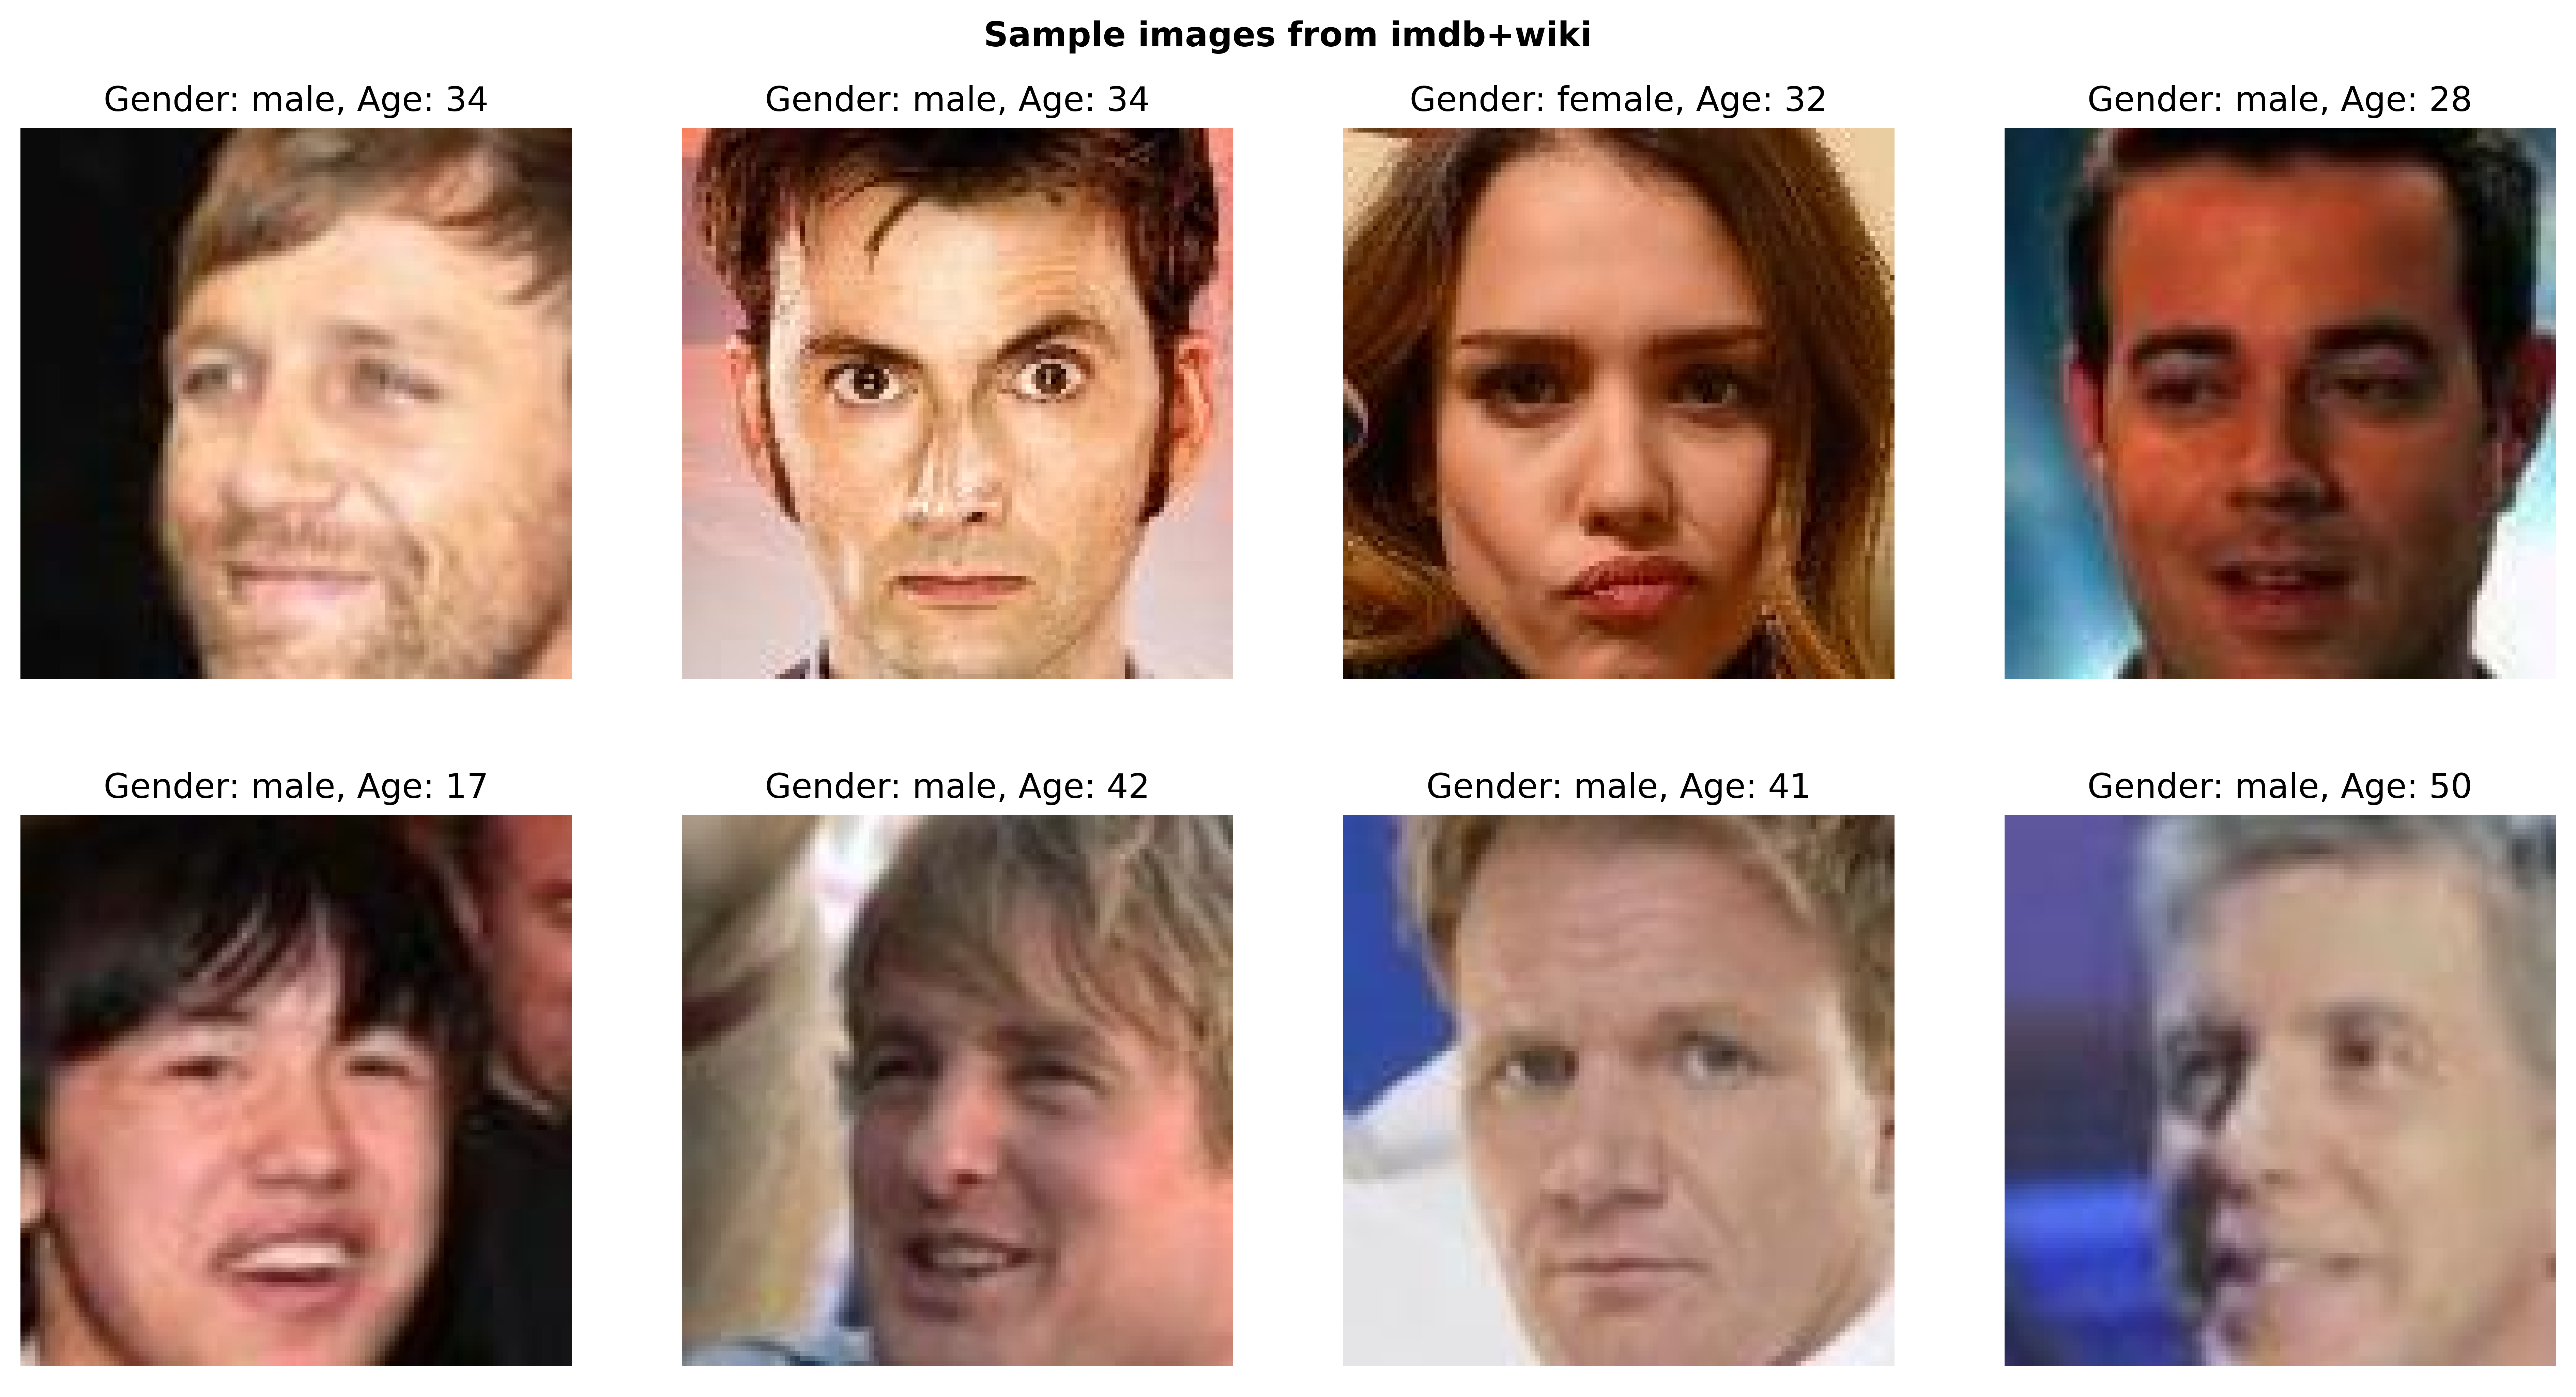

In [43]:
plt.figure(figsize = (16, 8), dpi = 600)
plt.axis('off')
plt.title('Sample images from imdb+wiki', pad = 25, fontweight = 'bold')
for i in range(8):
    index = np.random.randint(low = 0, high = len(labels_df))

    image = Image.open(os.path.join(new_images_dir, labels_df.iloc[index]['filename']))
    age = labels_df.iloc[index]['age']
    gender = labels_df.iloc[index]['gender']

    plt.subplot(2, 4, i+1)
    plt.imshow(image)
    plt.title(f'Gender: {"male" if gender else "female"}, Age: {age}')
    plt.axis('off')

plt.savefig(
    os.path.join(figures_output_dir, 'Sample images from imdb+wiki')
)
plt.show()